
1. 문제 제기
이탈률 = 이탈 자수 / 총 고객수(연도별 누적 가입자수 or 특성 그룹의 사람 수)
연도별로 이탈 여부 (한번이라도)

특성 그룹 (이탈 횟수)

click_stream 거래를 안한 개인의 행동분석 (customer_id)

세션 분할
click_stream 세션 엄청 길었던게(70일) 69

click_stream - customer_id 있는데 거래를 안한정보

click_stream - customer_id : transaction > 거래


2. 이탈 모델 (이탈 확률)
homepage -> booking 비율 높을때 (homepage)
homepage -> booking 비율 낮을때 (booking)
기준?

1]10일동안 hmpage 방문 안한고객 이탈
2]30일동안 booking 방문 안한고객 이탈


코로나 이후로 소비 패턴이 변화되어 회사의 행동을 결정하기 위한 분석 
이탈 모델의 경우는 20~21 년도 행동 분석으로
이탈 특성 생성 (0/1)

전체 고객에 대한 이탈 비율
한 고객의 이탈 횟수

이커머스 평균 구매 전환률 2%

In [1]:
import pandas as pd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


In [2]:
click_stream = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/data_refine/click_stream_final.csv')
transaction = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/data_refine/transaction_final.csv')
product = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/data_refine/product_final.csv')
customer = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/data_refine/customer_final.csv')

In [467]:
#session_id 와 customer_id 가 1대1 인지 확인하는 코드
customer_cnt = transaction.groupby('session_id')['customer_id'].nunique()
customer_cnt.value_counts()

customer_id
1    852582
Name: count, dtype: int64

In [73]:

#중복제거
trans = transaction[['session_id', 'customer_id', 'booking_id']].drop_duplicates()
merged_data = pd.merge(click_stream, trans, on = 'session_id' , how = 'left')

#구매내역이 있는 고객의 click stream 데이터
notnull_merge = merged_data[merged_data['customer_id'].notnull()].sort_values(['customer_id', 'event_time']).reset_index(drop = True)

#구매내역이 없는 고객의 click stream 데이터
isnull_merge = merged_data[merged_data['customer_id'].isnull()].sort_values(['session_id', 'event_time']).reset_index(drop = True)

## 데이터 분포

In [ ]:
#event_time 기준으로 연도별 데이터 분할
notnull_merge['event_time'] = pd.to_datetime(notnull_merge['event_time'])

df_2016 = notnull_merge[notnull_merge['event_time'].dt.year == 2016]
df_2017 = notnull_merge[notnull_merge['event_time'].dt.year == 2017]
df_2018 = notnull_merge[notnull_merge['event_time'].dt.year == 2018]
df_2019 = notnull_merge[notnull_merge['event_time'].dt.year == 2019]
df_2020 = notnull_merge[notnull_merge['event_time'].dt.year == 2020]
df_2021 = notnull_merge[notnull_merge['event_time'].dt.year == 2021]
df_2022 = notnull_merge[notnull_merge['event_time'].dt.year == 2022]


In [ ]:
data_count = pd.DataFrame([len(df_2016), len(df_2017), len(df_2018), len(df_2019), len(df_2020), len(df_2021), len(df_2022)])

In [ ]:
#연도별 click_stream 데이터 분포

plt.figure(figsize=(10, 6))
plt.bar([2016, 2017, 2018, 2019, 2020, 2021, 2022], data_count[0])
plt.xlabel('Year')
plt.ylabel('Data Size')
plt.title(f'YEARLY DATA SIZES')
plt.show

## 신규 가입 분석

### 연도별 신규가입

In [ ]:
#연도별 신규 가입 고객 수 계산

customer.first_join_date = pd.to_datetime(customer.first_join_date)

join_2016 = customer[customer.first_join_date.dt.year == 2016]
join_2017 = customer[customer.first_join_date.dt.year == 2017]
join_2018 = customer[customer.first_join_date.dt.year == 2018]
join_2019 = customer[customer.first_join_date.dt.year == 2019]
join_2020 = customer[customer.first_join_date.dt.year == 2020]
join_2021 = customer[customer.first_join_date.dt.year == 2021]
join_2022 = customer[customer.first_join_date.dt.year == 2022]

join_count = pd.DataFrame([len(join_2016), len(join_2017), len(join_2018), len(join_2019), len(join_2020), len(join_2021), len(join_2022)])

In [ ]:
#연도별 신규 가입 고객 수 그래프 

plt.figure(figsize=(10, 6))
plt.plot([2016, 2017, 2018, 2019, 2020, 2021, 2022], join_count)
plt.xlabel('Year')
plt.ylabel('User')
plt.title(f'YEARLY JOIN USER')
plt.show

### 월간 신규가입

In [ ]:
#월간 신규 가입 고객 수 계산
def monthly_join_user(df):
    list = []
    for i in range(1,13):
        list.append(len(df[df.first_join_date.dt.month == i]))
        year = df.first_join_date.dt.year.unique()[0]
    return [list, year]

#월간 신규 가입 고객 수 그래프 
def plot_monthly_graph(df):
    plt.figure(figsize=(10, 6))
    plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], df[0])
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.xlabel('Month')
    plt.ylabel('User')
    plt.title(f'{df[1]} MONTHLY JOIN USER')
    return plt.show

In [ ]:
#월간 신규 가입

plot_monthly_graph(monthly_join_user(join_2016))
plot_monthly_graph(monthly_join_user(join_2017))
plot_monthly_graph(monthly_join_user(join_2018))
plot_monthly_graph(monthly_join_user(join_2019))
plot_monthly_graph(monthly_join_user(join_2020))
plot_monthly_graph(monthly_join_user(join_2021))
plot_monthly_graph(monthly_join_user(join_2022))

### 누적 고객수

In [ ]:
# 전체 기간 누적 고객 수 구하기
#concat 하기 위해 데이터 프레임으로 변경
monthly_2016 = pd.DataFrame(monthly_join_user(join_2016)[0])
monthly_2017 = pd.DataFrame(monthly_join_user(join_2017)[0])
monthly_2018 = pd.DataFrame(monthly_join_user(join_2018)[0])
monthly_2019 = pd.DataFrame(monthly_join_user(join_2019)[0])
monthly_2020 = pd.DataFrame(monthly_join_user(join_2020)[0])
monthly_2021 = pd.DataFrame(monthly_join_user(join_2021)[0])
monthly_2022 = pd.DataFrame(monthly_join_user(join_2022)[0])

#전체 기간 concat
monthly_total = pd.concat([monthly_2016, monthly_2017, monthly_2018, monthly_2019, monthly_2020, monthly_2021, monthly_2022]).reset_index(drop = True)

#전체 기간 누적 데이터 생성
monthly_total['Cumulative People'] = monthly_total[0].cumsum()


In [ ]:
#누적 고객 그래프 

plt.figure(figsize=(20, 6))
plt.plot(monthly_total['Cumulative People'])
plt.xticks(range(1, 85), ['01-16', '02-16', '03-16', '04-16', '05-16', '06-16', '07-16', '08-16', '09-16', '10-16', '11-16', '12-16',
'01-17', '02-17', '03-17', '04-17', '05-17', '06-17', '07-17', '08-17', '09-17', '10-17', '11-17', '12-17',
 '01-18', '02-18', '03-18', '04-18', '05-18', '06-18', '07-18', '08-18', '09-18', '10-18', '11-18', '12-18',
 '01-19', '02-19', '03-19', '04-19', '05-19', '06-19', '07-19', '08-19', '09-19', '10-19', '11-19', '12-19',
 '01-20', '02-20', '03-20', '04-20', '05-20', '06-20', '07-20', '08-20', '09-20', '10-20', '11-20', '12-20',
'01-21', '02-21', '03-21', '04-21', '05-21', '06-21', '07-21', '08-21', '09-21', '10-21', '11-21', '12-21',
'01-22', '02-22', '03-22', '04-22', '05-22', '06-22', '07-22', '08-22', '09-22', '10-22', '11-22', '12-22' ], rotation= 45)
plt.xlabel('Month')
plt.ylabel('User')
plt.title(f'MONTHLY JOIN USER')
plt.show

### 전월대비 증감률

In [ ]:
# 전월 대비 신규 고객의 증감율 계산해보기
rate = []
for i in range(len(monthly_total)-1):
    m1 = monthly_total[0][i]
    m2 = monthly_total[0][i+1]
    if m1 != 0:
        res = (m2 - m1) / m1 * 100
    if m1 == 0:
        res = 0
    rate.append(res)


In [ ]:
# 전월 대비 신귝 고객의 증감율 그래프
plt.figure(figsize=(20, 6))
plt.plot(rate[6:-5])
plt.xticks(range(0, 72), ['08-16', '09-16', '10-16', '11-16', '12-16',
'01-17', '02-17', '03-17', '04-17', '05-17', '06-17', '07-17', '08-17', '09-17', '10-17', '11-17', '12-17',
 '01-18', '02-18', '03-18', '04-18', '05-18', '06-18', '07-18', '08-18', '09-18', '10-18', '11-18', '12-18',
 '01-19', '02-19', '03-19', '04-19', '05-19', '06-19', '07-19', '08-19', '09-19', '10-19', '11-19', '12-19',
 '01-20', '02-20', '03-20', '04-20', '05-20', '06-20', '07-20', '08-20', '09-20', '10-20', '11-20', '12-20',
'01-21', '02-21', '03-21', '04-21', '05-21', '06-21', '07-21', '08-21', '09-21', '10-21', '11-21', '12-21',
'01-22', '02-22', '03-22', '04-22', '05-22', '06-22', '07-22' ], rotation= 45)
plt.axhline(y=0, color = 'red', alpha = 0.4)
plt.xlabel('Month')
plt.ylabel('User')
plt.title('Month-on-month growth rate of new customer sign-ups')
plt.show

7월에 전월 대비 많은 유저가 유입되는 것을 볼 수 있다.

## 이탈 분석

### 연도별 구매 이용 고객의 비율

In [ ]:
#연도별 구매한 고객의 수 리스트
buy_customer = [df_2016.customer_id.nunique(), df_2017.customer_id.nunique(), df_2018.customer_id.nunique(), df_2019.customer_id.nunique(), df_2020.customer_id.nunique(), df_2021.customer_id.nunique(), df_2022.customer_id.nunique()]

In [ ]:

buy_year = pd.DataFrame(columns=['user', 'buy_user'])

#누적 회원수
buy_year['user'] = join_count.cumsum()[0]

#연도별 구매 고객 리스트
buy_year['buy_user'] = buy_customer

buy_year.index = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

#연도별 전체 회원 중 구매 이용 고객 비율
buy_year['buy_ratio'] = buy_year['buy_user']/buy_year['user']
buy_year

In [ ]:
#연도별 전체 회원 중 구매 이용 고객 비율 그래프
plt.figure(figsize=(10, 6))
plt.plot(buy_year['buy_ratio'])
plt.xlabel('Year')
plt.ylabel('Buy_User/Total_User')
plt.title('BUY USER RATIO BY YEAR')
plt.show

문제제기 : 회원수는 늘어나는 것 같아 보이지만 실제적으로 구매로 이어지는 회원비율는 감소하고 있다.

### 이탈 함수

In [ ]:
# 구매내역 있는 고객 데이터 (stream / customer / transaction)
buy_customer = pd.merge(notnull_merge, customer, on = 'customer_id', how = 'left')
buy_customer.head()

In [ ]:
#연도별로 나누기
buy_2016 = buy_customer[buy_customer['event_time'].dt.year == 2016]
buy_2017 = buy_customer[buy_customer['event_time'].dt.year == 2017]
buy_2018 = buy_customer[buy_customer['event_time'].dt.year == 2018]
buy_2019 = buy_customer[buy_customer['event_time'].dt.year == 2019]
buy_2020 = buy_customer[buy_customer['event_time'].dt.year == 2020]
buy_2021 = buy_customer[buy_customer['event_time'].dt.year == 2021]
buy_2022 = buy_customer[buy_customer['event_time'].dt.year == 2022]


In [ ]:
buy_2016[buy_2016.customer_id == buy_2016.customer_id.unique()[0]]

In [ ]:
base_period = 10

In [ ]:
product

In [ ]:
transaction

In [ ]:
transaction[transaction['session_id'] == '3abaa6ce-e320-4e51-9469-d9f3fa328e86']

In [ ]:
transaction[transaction['product_id'] == 53759]

## 세션 분할
기준: 30분(30분 동안 event가 발생하지 않는 경우 새로운 세션으로 구분) / 자정
이유: 정확한 유저의 행동 분석


In [74]:
def session_split(df):
    new_df = df.copy()  # 원본 데이터프레임 복사

    grouped = new_df.groupby('session_id')
    for session_id, session_row in grouped:

        # 시간 차이 계산
        session_row['time_diff'] = session_row['event_time'].diff().fillna(pd.Timedelta(seconds=0))

        i = 0
        new_session_ids = []
        prev_row = None
        for _, row in session_row.iterrows():
            # 1800초 이상 이거나 자정이 넘어간 경우 분할 진행
            if row['time_diff'].seconds > 1800 or (prev_row is not None and row['event_time'].date() != prev_row['event_time'].date()):
                i += 1
            # 새로운 세션 ID 생성
            prev_row = row
            new_session_id = f'_{i}'
            new_session_ids.append(new_session_id)

        # 세션 ID 일괄 변경
        new_df.loc[session_row.index, 'session_id'] += pd.Series(new_session_ids, index=session_row.index)

    return new_df


### customer_id (O)

In [76]:
notnull_merge.event_time = pd.to_datetime(notnull_merge.event_time)

In [77]:
# 세션이 연도가 바뀌어도 이어진 세션 아이디 추출

group_df = notnull_merge.groupby('session_id')
over_year = []
years = []
for session_id, session_row in group_df:
    year_count = session_row['event_time'].dt.year.nunique()
    years.append(year_count)
    if year_count > 1:    
        over_year.append(session_id)


In [78]:
# 27266 개의 세션이 연도가 바뀌어도 이어짐
len(over_year)

27266

In [79]:
#리스트에서 값과 개수 파악하기
from collections import Counter
Counter(years)

Counter({1: 825316, 2: 27053, 3: 210, 4: 3})

In [80]:
27053+ 210*2+ 3*3

27482

In [81]:
new_df = notnull_merge.copy()

# session_id 가 over_year에 있는 데이터의 연도 리스트 생성
year_series = new_df.loc[new_df['session_id'].isin(over_year), 'event_time'].dt.year

# session_id에 연도 추가
new_df.loc[new_df['session_id'].isin(over_year), 'session_id'] += "_" + year_series.astype(str)


In [82]:
# session 아이디 증가 확인
before = len(notnull_merge.session_id.value_counts())
after = len(new_df.session_id.value_counts())
print(before, after, after - before)


852582 880064 27482


In [83]:
# 연도별 데이터 분할
df_2016_buy = new_df[new_df['event_time'].dt.year == 2016]
df_2017_buy = new_df[new_df['event_time'].dt.year == 2017]
df_2018_buy = new_df[new_df['event_time'].dt.year == 2018]
df_2019_buy = new_df[new_df['event_time'].dt.year == 2019]
df_2020_buy = new_df[new_df['event_time'].dt.year == 2020]
df_2021_buy = new_df[new_df['event_time'].dt.year == 2021]
df_2022_buy = new_df[new_df['event_time'].dt.year == 2022]


In [84]:
print(len(df_2016_buy))
print(len(df_2017_buy))
print(len(df_2018_buy))
print(len(df_2019_buy))
print(len(df_2020_buy))
print(len(df_2021_buy))
print(len(df_2022_buy))

68759
490071
1051268
1687224
2501775
3737754
2926153


In [85]:
#1년 데이터에 대해서 분기를 표현하는 session_id 추가
def quarter_split(df):
    new_df = df.copy()
    new_df['quarter'] = (df.event_time.dt.month - 1) // 3 + 1
    new_df.session_id = new_df.session_id + '_' + new_df['quarter'].astype(str)
    return new_df

In [86]:
df_2016_buy.session_id.nunique()

5164

In [87]:
df_2016_buy_split = session_split(df_2016_buy)
df_2016_buy_split.to_csv('df_2016_buy_split.csv', index = False)

In [88]:
df_2017_buy_split = session_split(df_2017_buy)
df_2017_buy_split.to_csv('df_2017_buy_split.csv', index = False)

In [89]:
df_2018_buy_split = session_split(df_2018_buy)
df_2018_buy_split.to_csv('df_2018_buy_split.csv', index = False)

In [90]:
#2019년 분기별 데이터 분할
df_2019_tem = quarter_split(df_2019_buy)
df_2019_tem_1 = df_2019_tem[df_2019_tem['quarter']  == 1]
df_2019_tem_2 = df_2019_tem[df_2019_tem['quarter']  == 2]
df_2019_tem_3 = df_2019_tem[df_2019_tem['quarter']  == 3]
df_2019_tem_4 = df_2019_tem[df_2019_tem['quarter']  == 4]

In [91]:
df_2019_buy_split_1 = session_split(df_2019_tem_1)
df_2019_buy_split_1.to_csv('df_2019_buy_split_1.csv', index = False)

In [92]:
df_2019_buy_split_2 = session_split(df_2019_tem_2)
df_2019_buy_split_2.to_csv('df_2019_buy_split_2.csv', index = False)

In [93]:
df_2019_buy_split_3 = session_split(df_2019_tem_3)
df_2019_buy_split_3.to_csv('df_2019_buy_split_3.csv', index = False)

In [94]:
df_2019_buy_split_4 = session_split(df_2019_tem_4)
df_2019_buy_split_4.to_csv('df_2019_buy_split_4.csv', index = False)

In [95]:
#2020년 분기별 데이터 분할
df_2020_tem = quarter_split(df_2020_buy)
df_2020_tem_1 = df_2020_tem[df_2020_tem['quarter']  == 1]
df_2020_tem_2 = df_2020_tem[df_2020_tem['quarter']  == 2]
df_2020_tem_3 = df_2020_tem[df_2020_tem['quarter']  == 3]
df_2020_tem_4 = df_2020_tem[df_2020_tem['quarter']  == 4]

In [96]:
df_2020_buy_split_1 = session_split(df_2020_tem_1)
df_2020_buy_split_1.to_csv('df_2020_buy_split_1.csv', index = False)

In [97]:
df_2020_buy_split_2 = session_split(df_2020_tem_2)
df_2020_buy_split_2.to_csv('df_2020_buy_split_2.csv', index = False)

In [98]:
df_2020_buy_split_3 = session_split(df_2020_tem_3)
df_2020_buy_split_3.to_csv('df_2020_buy_split_3.csv', index = False)

In [99]:
df_2020_buy_split_4 = session_split(df_2020_tem_4)
df_2020_buy_split_4.to_csv('df_2020_buy_split_4.csv', index = False)

In [100]:
#2021년 분기별 데이터 분할
df_2021_tem = quarter_split(df_2021_buy)
df_2021_tem_1 = df_2021_tem[df_2021_tem['quarter']  == 1]
df_2021_tem_2 = df_2021_tem[df_2021_tem['quarter']  == 2]
df_2021_tem_3 = df_2021_tem[df_2021_tem['quarter']  == 3]
df_2021_tem_4 = df_2021_tem[df_2021_tem['quarter']  == 4]

In [101]:
df_2021_buy_split_1 = session_split(df_2021_tem_1)
df_2021_buy_split_1.to_csv('df_2021_buy_split_1.csv', index = False)

In [102]:
df_2021_buy_split_2 = session_split(df_2021_tem_2)
df_2021_buy_split_2.to_csv('df_2021_buy_split_2.csv', index = False)

In [103]:
df_2021_buy_split_3 = session_split(df_2021_tem_3)
df_2021_buy_split_3.to_csv('df_2021_buy_split_3.csv', index = False)

In [104]:
df_2021_buy_split_4 = session_split(df_2021_tem_4)
df_2021_buy_split_4.to_csv('df_2021_buy_split_4.csv', index = False)

In [105]:
#2022년 분기별 데이터 분할
df_2022_tem = quarter_split(df_2022_buy)
df_2022_tem_1 = df_2022_tem[df_2022_tem['quarter']  == 1]
df_2022_tem_2 = df_2022_tem[df_2022_tem['quarter']  == 2]
df_2022_tem_3 = df_2022_tem[df_2022_tem['quarter']  == 3]


In [106]:
df_2022_buy_split_1 = session_split(df_2022_tem_1)
df_2022_buy_split_1.to_csv('df_2022_buy_split_1.csv', index = False)

In [107]:
df_2022_buy_split_2 = session_split(df_2022_tem_2)
df_2022_buy_split_2.to_csv('df_2022_buy_split_2.csv', index = False)

In [108]:
df_2022_buy_split_3 = session_split(df_2022_tem_3)
df_2022_buy_split_3.to_csv('df_2022_buy_split_3.csv', index = False)

In [109]:
df_2016_buy_split = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2016_buy_split.csv')
df_2017_buy_split = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2017_buy_split.csv')
df_2018_buy_split = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2018_buy_split.csv')
df_2019_buy_split_1 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2019_buy_split_1.csv')
df_2019_buy_split_2 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2019_buy_split_2.csv')
df_2019_buy_split_3 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2019_buy_split_3.csv')
df_2019_buy_split_4 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2019_buy_split_4.csv')
df_2020_buy_split_1 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2020_buy_split_1.csv')
df_2020_buy_split_2 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2020_buy_split_2.csv')
df_2020_buy_split_3 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2020_buy_split_3.csv')
df_2020_buy_split_4 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2020_buy_split_4.csv')
df_2021_buy_split_1 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2021_buy_split_1.csv')
df_2021_buy_split_2 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2021_buy_split_2.csv')
df_2021_buy_split_3 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2021_buy_split_3.csv')
df_2021_buy_split_4 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2021_buy_split_4.csv')
df_2022_buy_split_1 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2022_buy_split_1.csv')
df_2022_buy_split_2 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2022_buy_split_2.csv')
df_2022_buy_split_3 = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_2022_buy_split_3.csv')

In [110]:
df_buy_split= pd.concat([df_2016_buy_split,
           df_2017_buy_split,
           df_2018_buy_split,
           df_2019_buy_split_1,
           df_2019_buy_split_2,
           df_2019_buy_split_3,
           df_2019_buy_split_4,
           df_2020_buy_split_1,
           df_2020_buy_split_2,
           df_2020_buy_split_3,
           df_2020_buy_split_4,
           df_2021_buy_split_1,
           df_2021_buy_split_2,
           df_2021_buy_split_3,
           df_2021_buy_split_4,
           df_2022_buy_split_1,
           df_2022_buy_split_2,
           df_2022_buy_split_3])

In [111]:
df_buy_split

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,booking_id,quarter
0,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:17:34.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,50.0,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN
1,44122af0-0bf5-407b-b3ff-22c082c61426_0,ADD_TO_CART,2016-10-09 21:28:40.380487+00:00,MOBILE,24639.0,1,255356,NaN,NaN,0.0,0,50.0,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN
2,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:30:22.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,50.0,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN
3,44122af0-0bf5-407b-b3ff-22c082c61426_0,HOMEPAGE,2016-10-09 21:42:14.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,50.0,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN
4,44122af0-0bf5-407b-b3ff-22c082c61426_0,ITEM_DETAIL,2016-10-09 21:54:20.380487+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,50.0,097c5406-68c5-4ecc-8399-8745cb3ff0ca,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404406,be458630-6c39-4cf7-931d-010194e350d0_3_1,CLICK,2022-07-29 02:25:52.810263+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,99995.0,2f2f6ac1-5e9b-44e2-8afe-36c9895f9331,3.0
404407,be458630-6c39-4cf7-931d-010194e350d0_3_1,ITEM_DETAIL,2022-07-29 02:43:36.810263+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,99995.0,2f2f6ac1-5e9b-44e2-8afe-36c9895f9331,3.0
404408,be458630-6c39-4cf7-931d-010194e350d0_3_1,ITEM_DETAIL,2022-07-29 03:02:02.810263+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,99995.0,2f2f6ac1-5e9b-44e2-8afe-36c9895f9331,3.0
404409,be458630-6c39-4cf7-931d-010194e350d0_3_1,CLICK,2022-07-29 03:19:56.810263+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,99995.0,2f2f6ac1-5e9b-44e2-8afe-36c9895f9331,3.0


In [112]:
# notnull_merge['event_time'] = pd.to_datetime(notnull_merge['event_time'])
# len(notnull_merge[notnull_merge['event_time'].dt.year == 2016].session_id.unique())

In [113]:
# length = len(df_buy_split)
# old_sessions = []  # 빈 리스트 생성
# for i in range(length):
#     row = df_buy_split.iloc[i]
#     session_id = row.session_id
#     session_id_split = session_id.split('-')
#     session_id_split_len = len(session_id_split)
    
#     if session_id_split_len == 5:
#         old_sessions.append(session_id)
#     if session_id_split_len == 6:
#         old_sessions.append('-'.join(session_id_split[:-1]))
        
# df_buy_split['old_session'] = old_sessions  # 리스트를 사용하여 열을 추가
# df_buy_split['old_session'] = df_buy_split['old_session'].str.split('_').str[0]


In [114]:
df_buy_split.to_csv('df_buy_split.csv', index = False)

In [115]:
# tr_se_bo= transaction[['session_id', 'booking_id']].drop_duplicates()

In [116]:
# df_buy_split_book = pd.merge(df_buy_split, tr_se_bo, left_on='old_session', right_on='session_id', how = 'left')

In [117]:
# df_buy_split_book.drop(columns='session_id_y', inplace= True)

In [118]:
# df_buy_split_book.rename(columns={'session_id_x' : 'session_id'}, inplace=True)

In [119]:
# df_buy_split_book.to_csv('df_buy_split_book.csv', index = False)

In [120]:
# df_buy_split_book

### customer_id (X)

In [121]:
isnull_merge.drop(columns = ['booking_id', 'customer_id', 'payment_status', 'promo_amount', 'promo_code'], inplace =True)

In [122]:
isnull_merge

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,search_keywords
0,00038f48-10a2-4752-bdcf-4d12b5731f6e,HOMEPAGE,2021-01-16 16:36:26.918402+00:00,MOBILE,NaN,0,0,NaN
1,00038f48-10a2-4752-bdcf-4d12b5731f6e,ITEM_DETAIL,2021-01-16 16:44:18.918402+00:00,MOBILE,NaN,0,0,NaN
2,00038f48-10a2-4752-bdcf-4d12b5731f6e,ITEM_DETAIL,2021-01-16 16:51:45.918402+00:00,MOBILE,NaN,0,0,NaN
3,00038f48-10a2-4752-bdcf-4d12b5731f6e,ADD_TO_CART,2021-01-16 16:59:24.918402+00:00,MOBILE,20886.0,1,629485,NaN
4,00038f48-10a2-4752-bdcf-4d12b5731f6e,HOMEPAGE,2021-01-16 17:07:05.918402+00:00,MOBILE,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...
370593,fffe9f81-7737-47de-9468-8b7b7f93c25d,ADD_TO_CART,2018-05-24 17:35:57.717870+00:00,MOBILE,49510.0,1,246498,NaN
370594,fffe9f81-7737-47de-9468-8b7b7f93c25d,PROMO_PAGE,2018-05-24 17:42:10.717870+00:00,MOBILE,NaN,0,0,NaN
370595,fffe9f81-7737-47de-9468-8b7b7f93c25d,SEARCH,2018-05-24 17:48:10.717870+00:00,MOBILE,NaN,0,0,Dress
370596,fffe9f81-7737-47de-9468-8b7b7f93c25d,ITEM_DETAIL,2018-05-24 17:54:53.717870+00:00,MOBILE,NaN,0,0,NaN


In [123]:
isnull_merge.event_time = pd.to_datetime(isnull_merge.event_time)

In [124]:
df_n_buy_split = session_split(isnull_merge)

In [125]:
df_n_buy_split.to_csv('df_n_buy_split.csv', index = False)

In [126]:
print(isnull_merge.session_id.nunique())
print(df_n_buy_split.session_id.nunique())

42621
47209


# 세션 분석

In [127]:
x_tick = ['2020/08', '2020/09', '2020/10', '2020/11', '2020/12',
'2021/01', '2021/02', '2021/03', '2021/04', '2021/05', '2021/06', '2021/07', '2021/08', '2021/09', '2021/10', '2021/11', '2021/12',
'2022/01', '2022/02', '2022/03', '2022/04', '2022/05', '2022/06', '2022/07']

In [128]:
df_buy_split = pd.read_csv('df_buy_split.csv')

In [129]:
df_buy_split_cus = pd.merge(df_buy_split, customer, on ='customer_id', how = 'left')

In [130]:
# 데이터프레임에서 'event_time' 열을 날짜 형식으로 변환
df_buy_split_cus['event_time'] = pd.to_datetime(df_buy_split_cus['event_time'])

# 시작 및 종료 날짜 설정
start_date = pd.to_datetime('2020-08-01')
end_date = pd.to_datetime('2022-07-31')

## 세션 분포

In [131]:
tem = df_buy_split_cus[['session_id', 'event_name', 'event_time', 'booking_id', 'gender', 'customer_id', 'first_join_date', 'age_now', 'home_location']]

In [132]:
tem.event_name = tem.event_name.astype('category')
tem.gender = tem.gender.astype('category')
tem.customer_id = tem.customer_id.astype('int64')
tem.age_now = tem.age_now.astype('int32')
tem.home_location = tem.home_location.astype('category')

C:\Users\hm981\AppData\Local\Temp\ipykernel_26236\1741402177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tem.event_name = tem.event_name.astype('category')
C:\Users\hm981\AppData\Local\Temp\ipykernel_26236\1741402177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tem.gender = tem.gender.astype('category')
C:\Users\hm981\AppData\Local\Temp\ipykernel_26236\1741402177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [133]:
tem_f = tem[tem.gender == 'F']
tem_m = tem[tem.gender == 'M']

In [134]:
tem_0_to_14 = tem[tem['age_now'] <= 14]
tem_15_to_20 = tem[(tem['age_now'] <= 20) & ((tem['age_now'] >= 15))]
tem_21_to_25 = tem[(tem['age_now'] <= 25) & ((tem['age_now'] >= 21))]
tem_26_to_30 = tem[(tem['age_now'] <= 30) & ((tem['age_now'] >= 26))]
tem_31_to_35 = tem[(tem['age_now'] <= 35) & ((tem['age_now'] >= 31))]
tem_36_and_above = tem[tem['age_now'] >= 15]


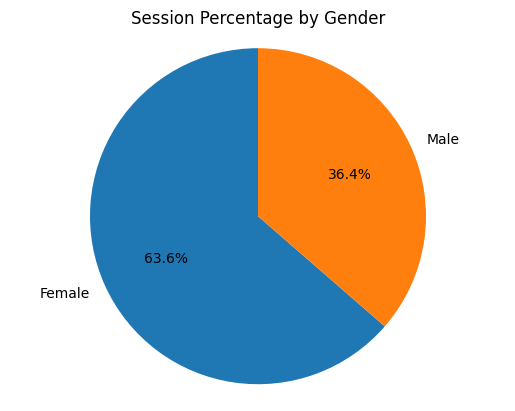

In [135]:

plt.pie([tem_f.session_id.nunique(), tem_m.session_id.nunique()], labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 차트를 원형으로 보이게 함
plt.title('Session Percentage by Gender')
plt.show()


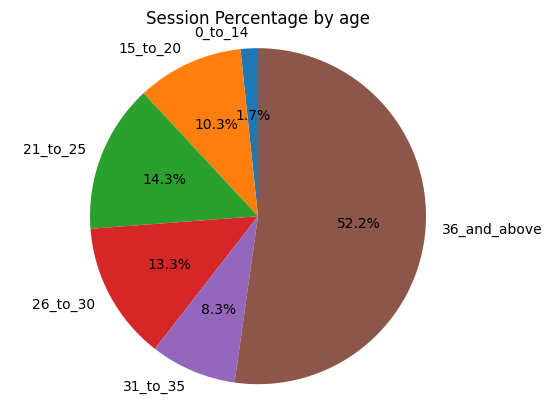

In [136]:
size = [tem_0_to_14.session_id.nunique(), tem_15_to_20.session_id.nunique(), tem_21_to_25.session_id.nunique(), tem_26_to_30.session_id.nunique(), tem_31_to_35.session_id.nunique(), tem_36_and_above.session_id.nunique()]
plt.pie(size, labels=['0_to_14', '15_to_20', '21_to_25', '26_to_30', '31_to_35', '36_and_above'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 차트를 원형으로 보이게 함
plt.title('Session Percentage by age')
plt.show()


## 전체 기간 월별 전환률

In [137]:
monthly_data = tem.groupby(pd.Grouper(key='event_time', freq='M'))

conversion_rate = pd.DataFrame(columns=['year/month', "conversion rate"])
m_l = []
c_r = []

# 그룹들 가져오기
groups = list(monthly_data.groups.keys())
# 마지막 그룹 제외한 나머지 그룹에 대해 루프 실행
for i in range(len(groups) - 1):
    month = groups[i]
    row = monthly_data.get_group(month)
    c_r.append(row.groupby('event_name').size()['BOOKING'] / row.session_id.nunique())
    m_l.append(month.strftime('%Y-%m'))

conversion_rate['year/month'] = m_l
conversion_rate['conversion rate'] = c_r


In [138]:
conversion_rate

,year/month,conversion rate
0,2016-06,1.000000
1,2016-07,0.406036
2,2016-08,0.254064
3,2016-09,0.152716
4,2016-10,0.146345
...,...,...
69,2022-03,0.088399
70,2022-04,0.088658
71,2022-05,0.088598
72,2022-06,0.091342


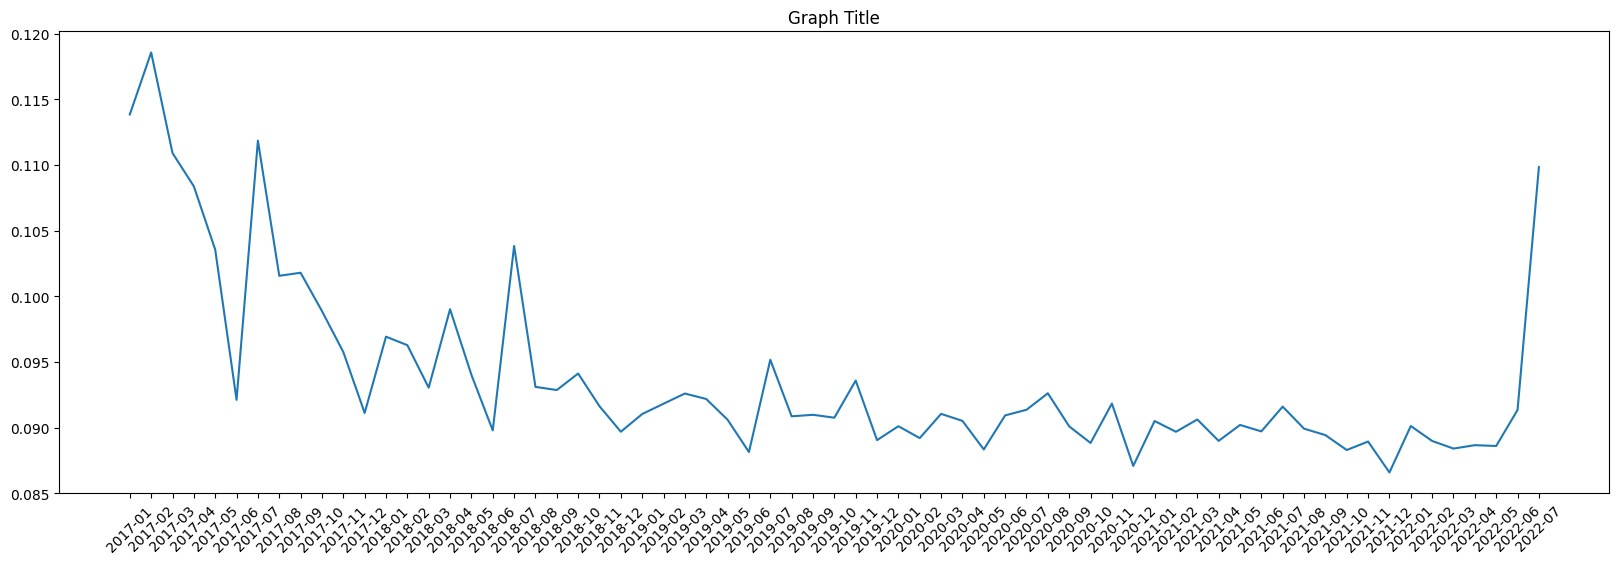

In [139]:
import matplotlib.pyplot as plt

# x축과 y축 데이터
x = conversion_rate['year/month'][7:]
y = conversion_rate['conversion rate'][7:]

# 그래프 
plt.figure(figsize=(20, 6))
plt.plot(x, y)
plt.xticks(rotation= 45)

plt.title('Graph Title')
plt.show()


In [140]:
def monthly_conversion(df):
    # 시작 날짜부터 종료 날짜까지의 범위에 해당하는 행 필터링
    fil_df = df[(pd.to_datetime(df['event_time'].dt.date) >= start_date) & (pd.to_datetime(df['event_time'].dt.date) <= end_date)]

    # 월별로 데이터 분할
    month_df = fil_df.groupby(pd.Grouper(key='event_time', freq='M'))

    con_df = pd.DataFrame(columns=['year/month', "conversion rate"])
    m_l = []
    c_r = []
    for month, row in month_df:
        c_r.append(row.groupby('event_name').size()['BOOKING']/row.session_id.nunique())
        m_l.append(month.strftime('%Y-%m'))
    con_df['year/month'] = m_l
    con_df['conversion rate'] = c_r
    
    plt.figure(figsize=(10, 6))
    plt.plot(con_df['conversion rate'])
    plt.xticks(range(0, 24), x_tick, rotation= 45)
    plt.show;

## 2020/08~2022/07 월별 전환률

In [141]:
# 시작 날짜부터 종료 날짜까지의 범위에 해당하는 행 필터링
filtered_df = df_buy_split_cus[(pd.to_datetime(df_buy_split_cus['event_time'].dt.date) >= start_date) & (pd.to_datetime(df_buy_split_cus['event_time'].dt.date) <= end_date)]

# 월별로 데이터 분할
monthly_data = filtered_df.groupby(pd.Grouper(key='event_time', freq='M'))

In [142]:

convesion_rate_2 = pd.DataFrame(columns=['year/month', "conversion rate"])
m_l_2 = []
c_r_2 = []
for month, row in monthly_data:
    c_r_2.append(row.groupby('event_name').size()['BOOKING']/row.session_id.nunique())
    m_l_2.append(month.strftime('%Y-%m'))
convesion_rate_2['year/month'] = m_l_2
convesion_rate_2['conversion rate'] = c_r_2

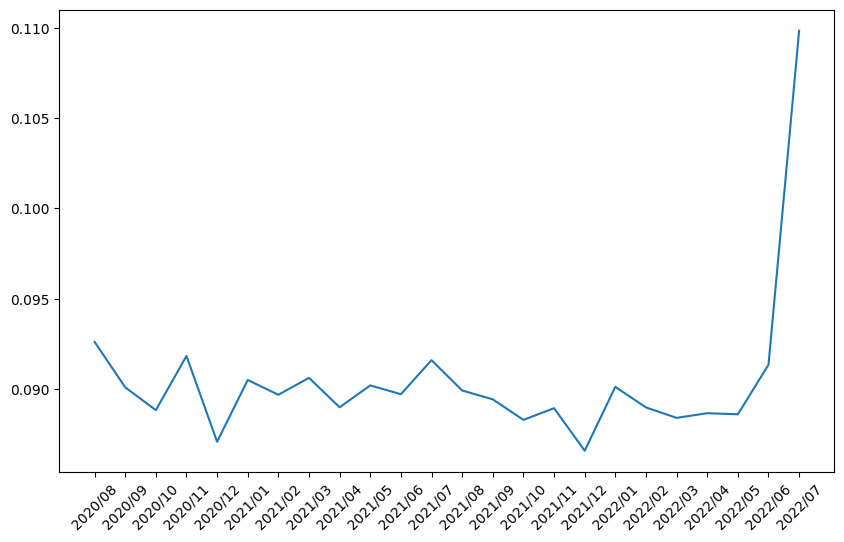

In [143]:
plt.figure(figsize=(10, 6))
plt.plot(convesion_rate_2['conversion rate'])
plt.xticks(range(0, 24), x_tick, rotation= 45)
plt.show;

## 그룹별 월별 전환률

### 성별

In [144]:
# 시작 날짜부터 종료 날짜까지의 범위에 해당하는 행 필터링
fil_tem_m = tem_m[(pd.to_datetime(tem_m['event_time'].dt.date) >= start_date) & (pd.to_datetime(tem_m['event_time'].dt.date) <= end_date)]
fil_tem_f = tem_f[(pd.to_datetime(tem_f['event_time'].dt.date) >= start_date) & (pd.to_datetime(tem_f['event_time'].dt.date) <= end_date)]


# 월별로 데이터 분할
month_tem_m = fil_tem_m.groupby(pd.Grouper(key='event_time', freq='M'))
month_tem_f = fil_tem_f.groupby(pd.Grouper(key='event_time', freq='M'))


con_tem_m = pd.DataFrame(columns=['year/month', "conversion rate"])
m_l = []
c_r = []
for month, row in month_tem_m:
    c_r.append(row.groupby('event_name').size()['BOOKING']/row.session_id.nunique())
    m_l.append(month.strftime('%Y-%m'))
con_tem_m['year/month'] = m_l
con_tem_m['conversion rate'] = c_r
    
con_tem_f = pd.DataFrame(columns=['year/month', "conversion rate"])
m_l2 = []
c_r2 = []
for month, row in month_tem_f:
    c_r2.append(row.groupby('event_name').size()['BOOKING']/row.session_id.nunique())
    m_l2.append(month.strftime('%Y-%m'))
con_tem_f['year/month'] = m_l2
con_tem_f['conversion rate'] = c_r2

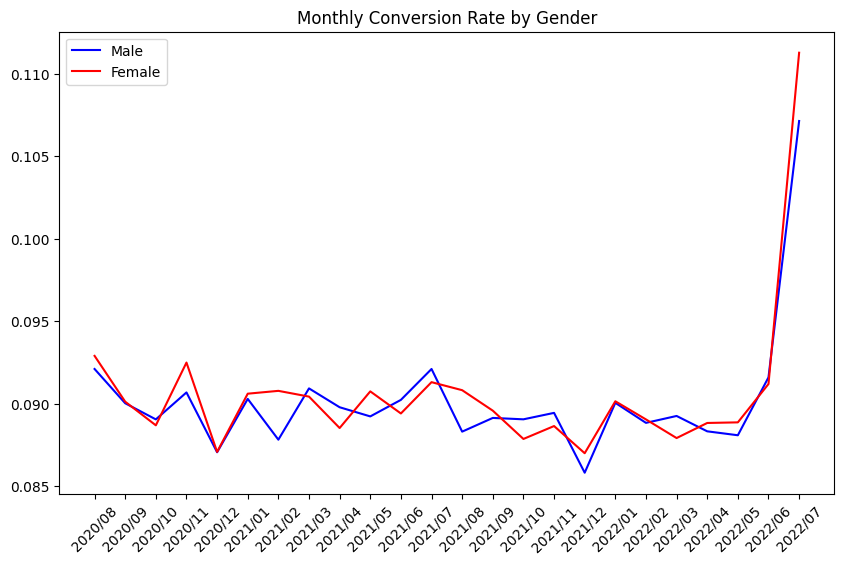

In [145]:
plt.figure(figsize=(10, 6))
plt.plot(con_tem_m['conversion rate'], color = 'blue', label = 'Male')
plt.plot(con_tem_f['conversion rate'], color = 'red', label = 'Female')
plt.legend()
plt.xticks(range(0, 24), x_tick, rotation= 45)
plt.title('Monthly Conversion Rate by Gender')
plt.show;

### 나이
0-14세 : 비타겟층 미성년자
15-20세: 미성년자
21-25세: 젊은 성인 20대 초반
26-30세: 중기 성인  20대 후반
31-35세: 후기 성인 30대 초반
36세 이상: 비타겟층 성인

In [146]:
# 시작 날짜부터 종료 날짜까지의 범위에 해당하는 행 필터링
fil_tem_0_to_14 = tem_0_to_14[(pd.to_datetime(tem_0_to_14['event_time'].dt.date) >= start_date) & (pd.to_datetime(tem_0_to_14['event_time'].dt.date) <= end_date)]
fil_tem_15_to_20 = tem_15_to_20[(pd.to_datetime(tem_15_to_20['event_time'].dt.date) >= start_date) & (pd.to_datetime(tem_15_to_20['event_time'].dt.date) <= end_date)]
fil_tem_21_to_25 = tem_21_to_25[(pd.to_datetime(tem_21_to_25['event_time'].dt.date) >= start_date) & (pd.to_datetime(tem_21_to_25['event_time'].dt.date) <= end_date)]
fil_tem_26_to_30 = tem_26_to_30[(pd.to_datetime(tem_26_to_30['event_time'].dt.date) >= start_date) & (pd.to_datetime(tem_26_to_30['event_time'].dt.date) <= end_date)]
fil_tem_31_to_35 = tem_31_to_35[(pd.to_datetime(tem_31_to_35['event_time'].dt.date) >= start_date) & (pd.to_datetime(tem_31_to_35['event_time'].dt.date) <= end_date)]
fil_tem_36_and_above = tem_36_and_above[(pd.to_datetime(tem_36_and_above['event_time'].dt.date) >= start_date) & (pd.to_datetime(tem_36_and_above['event_time'].dt.date) <= end_date)]


# 월별로 데이터 분할
month_tem_0_to_14 = fil_tem_0_to_14.groupby(pd.Grouper(key='event_time', freq='M'))
month_tem_15_to_20 = fil_tem_15_to_20.groupby(pd.Grouper(key='event_time', freq='M'))
month_tem_21_to_25 = fil_tem_21_to_25.groupby(pd.Grouper(key='event_time', freq='M'))
month_tem_26_to_30 = fil_tem_26_to_30.groupby(pd.Grouper(key='event_time', freq='M'))
month_tem_31_to_35 = fil_tem_31_to_35.groupby(pd.Grouper(key='event_time', freq='M'))
month_tem_36_and_above = fil_tem_36_and_above.groupby(pd.Grouper(key='event_time', freq='M'))


#0_to_14
con_tem_0_to_14 = pd.DataFrame(columns=['year/month', "conversion rate"])
m_l3 = []
c_r3 = []
for month, row in month_tem_0_to_14:
    c_r3.append(row.groupby('event_name').size()['BOOKING']/row.session_id.nunique())
    m_l3.append(month.strftime('%Y-%m'))
con_tem_0_to_14['year/month'] = m_l3
con_tem_0_to_14['conversion rate'] = c_r3

#15_to_20
con_tem_15_to_20 = pd.DataFrame(columns=['year/month', "conversion rate"])
m_l4 = []
c_r4 = []
for month, row in month_tem_15_to_20:
    c_r4.append(row.groupby('event_name').size()['BOOKING']/row.session_id.nunique())
    m_l4.append(month.strftime('%Y-%m'))
con_tem_15_to_20['year/month'] = m_l4
con_tem_15_to_20['conversion rate'] = c_r4

#21_to_25
con_tem_21_to_25 = pd.DataFrame(columns=['year/month', "conversion rate"])
m_l5 = []
c_r5 = []
for month, row in month_tem_21_to_25:
    c_r5.append(row.groupby('event_name').size()['BOOKING']/row.session_id.nunique())
    m_l5.append(month.strftime('%Y-%m'))
con_tem_21_to_25['year/month'] = m_l5
con_tem_21_to_25['conversion rate'] = c_r5

#26_to_30
con_tem_26_to_30 = pd.DataFrame(columns=['year/month', "conversion rate"])
m_l6 = []
c_r6 = []
for month, row in month_tem_26_to_30:
    c_r6.append(row.groupby('event_name').size()['BOOKING']/row.session_id.nunique())
    m_l6.append(month.strftime('%Y-%m'))
con_tem_26_to_30['year/month'] = m_l6
con_tem_26_to_30['conversion rate'] = c_r6

#31_to_35
con_tem_31_to_35 = pd.DataFrame(columns=['year/month', "conversion rate"])
m_l7 = []
c_r7 = []
for month, row in month_tem_31_to_35:
    c_r7.append(row.groupby('event_name').size()['BOOKING']/row.session_id.nunique())
    m_l7.append(month.strftime('%Y-%m'))
con_tem_31_to_35['year/month'] = m_l7
con_tem_31_to_35['conversion rate'] = c_r7

#36_and_above
con_tem_36_and_above = pd.DataFrame(columns=['year/month', "conversion rate"])
m_l8 = []
c_r8 = []
for month, row in month_tem_36_and_above:
    c_r8.append(row.groupby('event_name').size()['BOOKING']/row.session_id.nunique())
    m_l8.append(month.strftime('%Y-%m'))
con_tem_36_and_above['year/month'] = m_l8
con_tem_36_and_above['conversion rate'] = c_r8

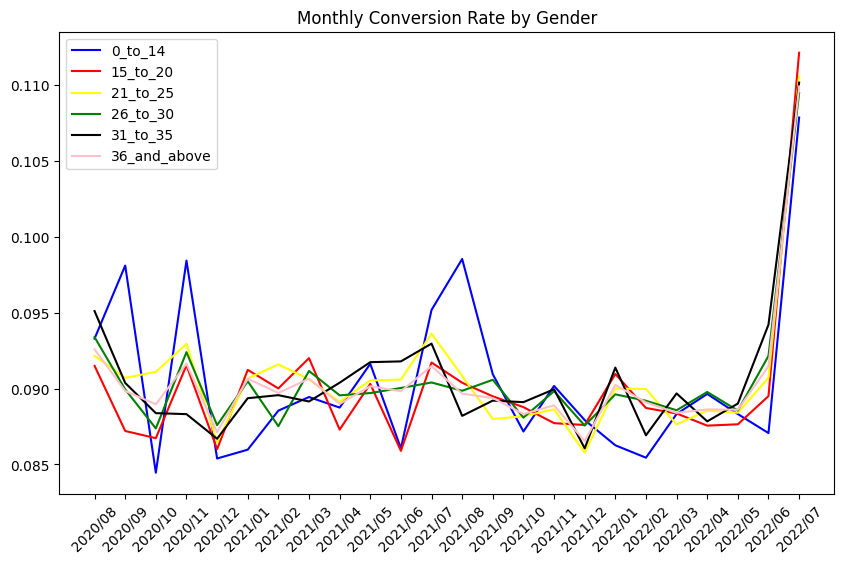

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(con_tem_0_to_14['conversion rate'], color = 'blue', label = '0_to_14')
plt.plot(con_tem_15_to_20['conversion rate'], color = 'red', label = '15_to_20')
plt.plot(con_tem_21_to_25['conversion rate'], color = 'yellow', label = '21_to_25')
plt.plot(con_tem_26_to_30['conversion rate'], color = 'green', label = '26_to_30')
plt.plot(con_tem_31_to_35['conversion rate'], color = 'black', label = '31_to_35')
plt.plot(con_tem_36_and_above['conversion rate'], color = 'pink', label = '36_and_above')
plt.legend()
plt.xticks(range(0, 24), x_tick, rotation= 45)
plt.title('Monthly Conversion Rate by Gender')
plt.show;

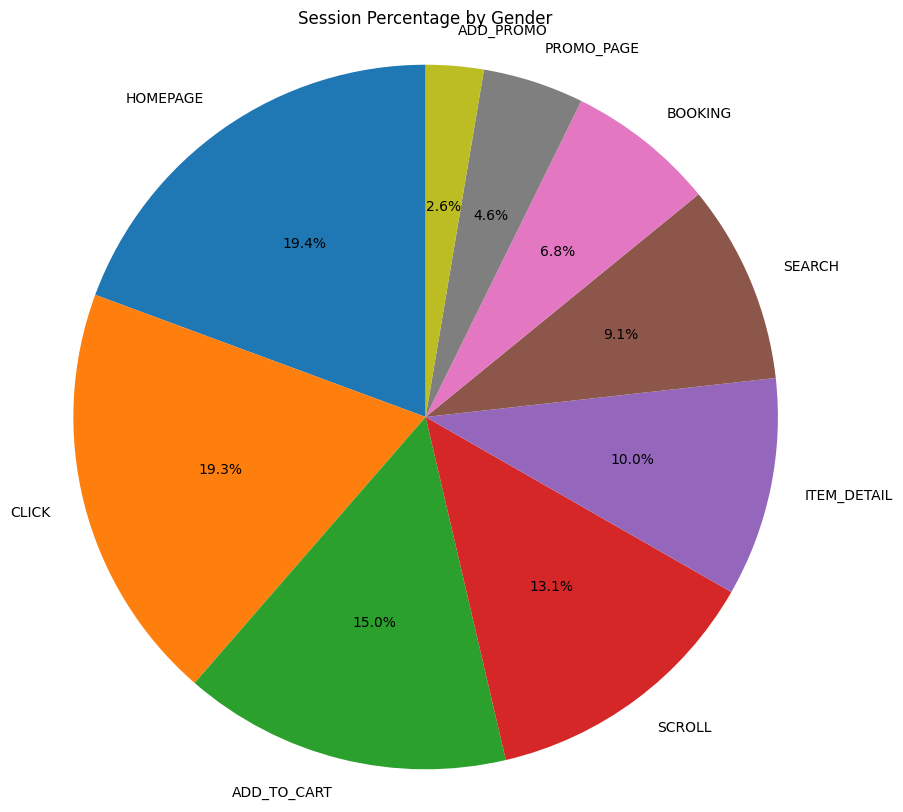

In [148]:
plt.figure(figsize=(10, 10))
plt.pie(list(tem_0_to_14.event_name.value_counts()), labels = list(tem_0_to_14.event_name.value_counts().keys()),  autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 차트를 원형으로 보이게 함
plt.title('Session Percentage by Gender')
plt.show()


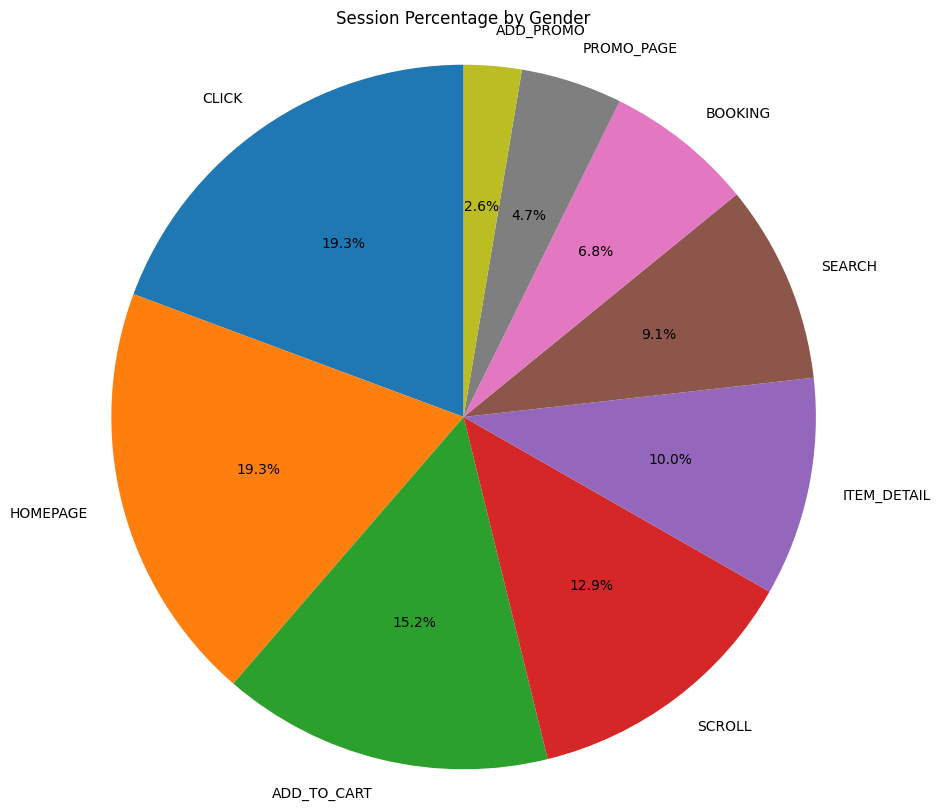

In [149]:
plt.figure(figsize=(10, 10))
plt.pie(list(tem_15_to_20.event_name.value_counts()), labels = list(tem_15_to_20.event_name.value_counts().keys()),  autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 차트를 원형으로 보이게 함
plt.title('Session Percentage by Gender')
plt.show()


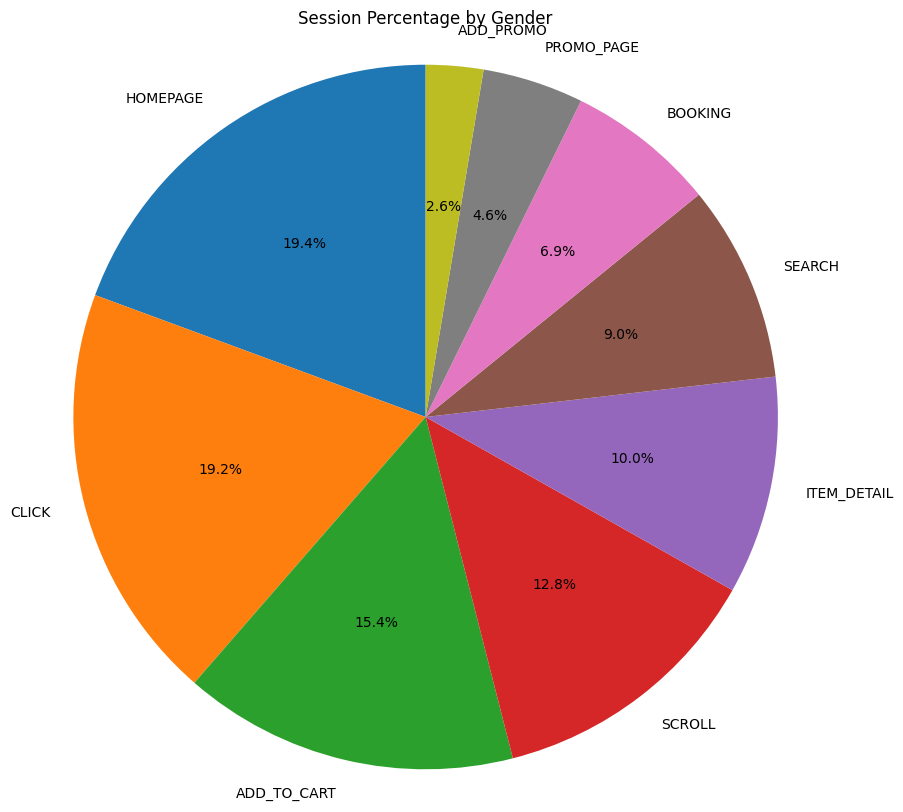

In [150]:
plt.figure(figsize=(10, 10))
plt.pie(list(tem_21_to_25.event_name.value_counts()), labels = list(tem_21_to_25.event_name.value_counts().keys()),  autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 차트를 원형으로 보이게 함
plt.title('Session Percentage by Gender')
plt.show()


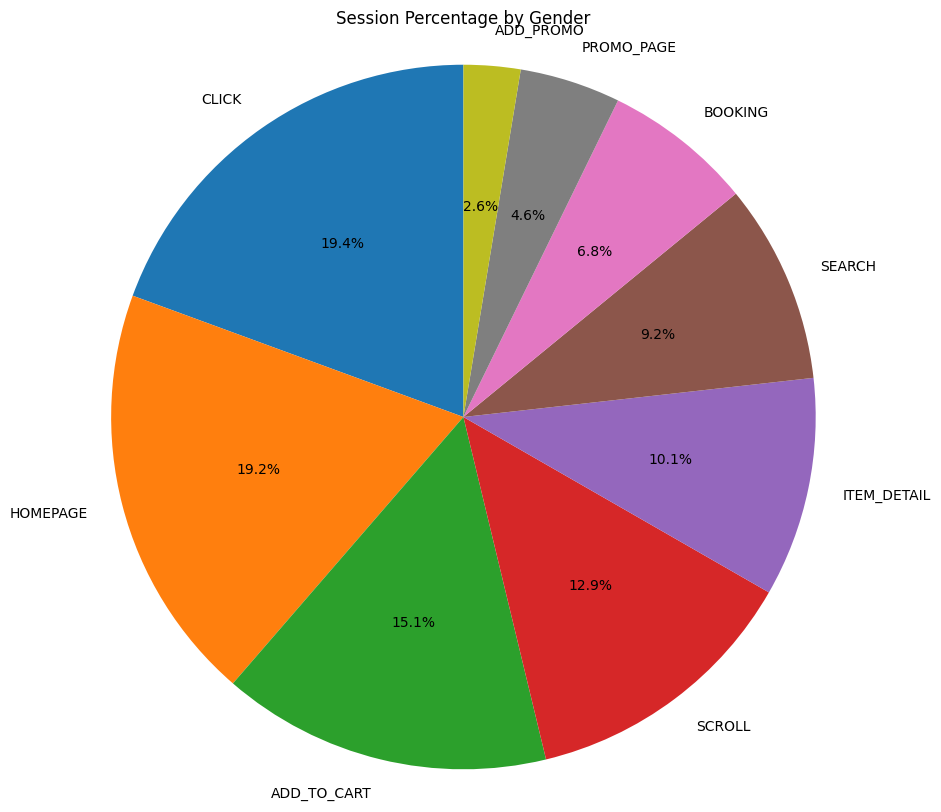

In [151]:
plt.figure(figsize=(10, 10))
plt.pie(list(tem_26_to_30.event_name.value_counts()), labels = list(tem_26_to_30.event_name.value_counts().keys()),  autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 차트를 원형으로 보이게 함
plt.title('Session Percentage by Gender')
plt.show()


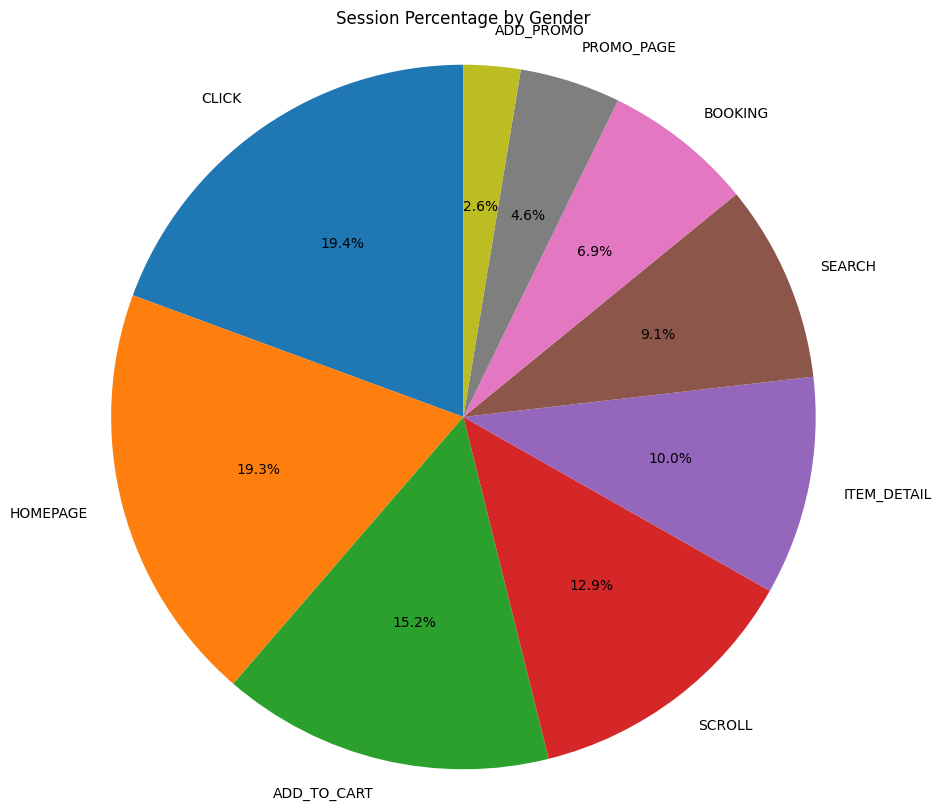

In [152]:
plt.figure(figsize=(10, 10))
plt.pie(list(tem_31_to_35.event_name.value_counts()), labels = list(tem_31_to_35.event_name.value_counts().keys()),  autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 차트를 원형으로 보이게 함
plt.title('Session Percentage by Gender')
plt.show()


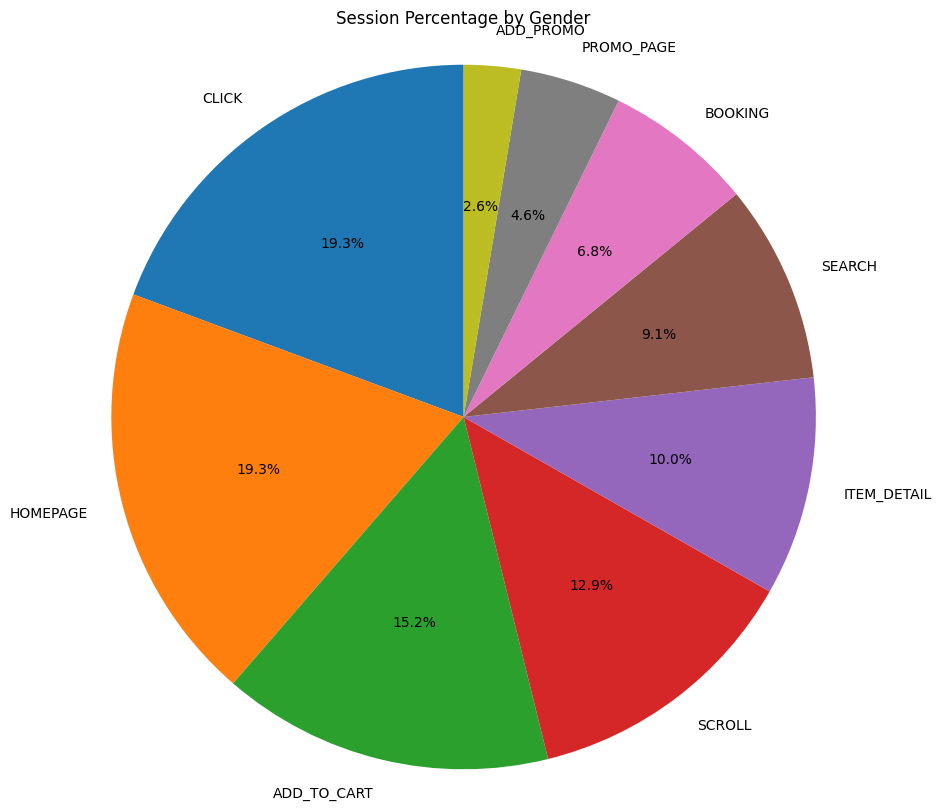

In [153]:
plt.figure(figsize=(10, 10))
plt.pie(list(tem_36_and_above.event_name.value_counts()), labels = list(tem_36_and_above.event_name.value_counts().keys()),  autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # 차트를 원형으로 보이게 함
plt.title('Session Percentage by Gender')
plt.show()


## 세션 데이터 만들기

In [154]:
start_date = pd.to_datetime('2020-08-01')
end_date = pd.to_datetime('2022-07-31')

In [155]:
df_session_b = df_buy_split_cus[['session_id', 'event_name', 'event_time', 'customer_id', 'booking_id']].copy()

In [ ]:
df_n_buy_split = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/df_n_buy_split.csv')

In [ ]:
df_session_n_b = df_n_buy_split[['session_id', 'event_name', 'event_time',]].copy()

In [ ]:
df_session_n_b['customer_id'] = None
df_session_n_b['booking_id'] = None

In [ ]:
df_session = pd.concat([df_session_b, df_session_n_b])

In [ ]:
df_session.sort_values(['customer_id', 'session_id', 'event_time'], inplace = True)

In [ ]:
df_session.reset_index(drop = True, inplace =True)

In [ ]:
df_session.to_csv("df_session.csv", index = False)

In [ ]:
df_session.event_time = pd.to_datetime(df_session.event_time)

In [ ]:
df_session_group = df_session.groupby('session_id')

In [ ]:
session_info = {}

for session, row in df_session_group:
    customer_id = row.iloc[0]['customer_id']
    session_info[session] = {'customer id': customer_id}

In [ ]:
for session, row in df_session_group:
    n_session = len(row)
    session_info[session].update({'number of events': n_session})
    

In [ ]:
for session, row in df_session_group:
    events = list(row['event_name'])
    session_info[session].update({'event list': events})
    

In [ ]:
for session, row in df_session_group:
    first_event_time = row.loc[row.index[0], 'event_time']
    last_event_time = row.loc[row.index[-1], 'event_time']
    time_diff = (last_event_time - first_event_time).total_seconds()
    session_info[session].update({'session duration': time_diff})

In [ ]:
session_info

{'00001f29-3ede-4445-95f0-0178934e32ba_2_0': {'customer id': 74433.0,
  'number of events': 1,
  'event list': ['HOMEPAGE'],
  'session duration': 0.0},
 '00001f29-3ede-4445-95f0-0178934e32ba_2_1': {'customer id': 74433.0,
  'number of events': 1,
  'event list': ['ADD_TO_CART'],
  'session duration': 0.0},
 '00001f29-3ede-4445-95f0-0178934e32ba_2_2': {'customer id': 74433.0,
  'number of events': 1,
  'event list': ['HOMEPAGE'],
  'session duration': 0.0},
 '00001f29-3ede-4445-95f0-0178934e32ba_2_3': {'customer id': 74433.0,
  'number of events': 1,
  'event list': ['CLICK'],
  'session duration': 0.0},
 '00001f29-3ede-4445-95f0-0178934e32ba_2_4': {'customer id': 74433.0,
  'number of events': 1,
  'event list': ['CLICK'],
  'session duration': 0.0},
 '00001f29-3ede-4445-95f0-0178934e32ba_2_5': {'customer id': 74433.0,
  'number of events': 1,
  'event list': ['ITEM_DETAIL'],
  'session duration': 0.0},
 '00001f29-3ede-4445-95f0-0178934e32ba_2_6': {'customer id': 74433.0,
  'number of

In [ ]:
df_session_info = pd.DataFrame.from_dict(session_info, orient = 'index')


In [ ]:
rfm = pd.read_csv('C:/Users/hm981/OneDrive/바탕 화면/AI부트캠프/project/teamproject2/customer_add_rfm.csv')
rfm.drop(columns= ['RFM_Segment_x'], inplace= True)
rfm.rename(columns= {'RFM_Segment_y' : 'RFM_Segment'}, inplace= True)
rfm.gender = rfm.gender.astype('category')
rfm.age_segment = rfm.age_segment.astype('category')
rfm['RFM_Segment'] = rfm['RFM_Segment'].astype('category')

In [ ]:
df_session_info.rename(columns = {"customer id" : 'customer_id'}, inplace = True)

In [ ]:
df_session_info.reset_index(inplace = True)

In [ ]:
df_session_info.rename(columns = {"index" : 'session_id'}, inplace = True)

In [ ]:
df_session_info

,session_id,customer_id,number of events,event list,session duration
0,00001f29-3ede-4445-95f0-0178934e32ba_2_0,74433.0,1,[HOMEPAGE],0.0
1,00001f29-3ede-4445-95f0-0178934e32ba_2_1,74433.0,1,[ADD_TO_CART],0.0
2,00001f29-3ede-4445-95f0-0178934e32ba_2_2,74433.0,1,[HOMEPAGE],0.0
3,00001f29-3ede-4445-95f0-0178934e32ba_2_3,74433.0,1,[CLICK],0.0
4,00001f29-3ede-4445-95f0-0178934e32ba_2_4,74433.0,1,[CLICK],0.0
...,...,...,...,...,...
12833597,fffffaf6-55ee-428b-a3bf-075cd7f1a093_5,52089.0,1,[SCROLL],0.0
12833598,fffffaf6-55ee-428b-a3bf-075cd7f1a093_6,52089.0,1,[CLICK],0.0
12833599,fffffaf6-55ee-428b-a3bf-075cd7f1a093_7,52089.0,1,[SCROLL],0.0
12833600,fffffaf6-55ee-428b-a3bf-075cd7f1a093_8,52089.0,1,[SEARCH],0.0


In [ ]:
df_session_info_rfm = pd.merge(df_session_info, rfm[['customer_id', 'RFM_Segment']], on = 'customer_id', how = 'left')

In [ ]:
df_session_info_rfm

,session_id,customer_id,number of events,event list,session duration,RFM_Segment
0,00001f29-3ede-4445-95f0-0178934e32ba_2_0,74433.0,1,[HOMEPAGE],0.0,322.0
1,00001f29-3ede-4445-95f0-0178934e32ba_2_1,74433.0,1,[ADD_TO_CART],0.0,322.0
2,00001f29-3ede-4445-95f0-0178934e32ba_2_2,74433.0,1,[HOMEPAGE],0.0,322.0
3,00001f29-3ede-4445-95f0-0178934e32ba_2_3,74433.0,1,[CLICK],0.0,322.0
4,00001f29-3ede-4445-95f0-0178934e32ba_2_4,74433.0,1,[CLICK],0.0,322.0
...,...,...,...,...,...,...
12833597,fffffaf6-55ee-428b-a3bf-075cd7f1a093_5,52089.0,1,[SCROLL],0.0,322.0
12833598,fffffaf6-55ee-428b-a3bf-075cd7f1a093_6,52089.0,1,[CLICK],0.0,322.0
12833599,fffffaf6-55ee-428b-a3bf-075cd7f1a093_7,52089.0,1,[SCROLL],0.0,322.0
12833600,fffffaf6-55ee-428b-a3bf-075cd7f1a093_8,52089.0,1,[SEARCH],0.0,322.0


## 데이터 구분

In [ ]:
#각 세그먼트 별 전체 데이터
a_322 =  df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 322)]
a_222 =  df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 222)]
a_122 =  df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 122)]

#각 세그먼트 별 세션 이벤트 수 1개 제외 데이터
n1_322 =  df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 322)  & (df_session_info_rfm['number of events'] != 1)]
n1_222 =  df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 222)  & (df_session_info_rfm['number of events'] != 1)]
n1_122 =  df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 122)  & (df_session_info_rfm['number of events'] != 1)]

#각 세그먼트 별 세션 이벤트 수 1개 인 데이터
o1_322 =  df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 322)  & (df_session_info_rfm['number of events'] == 1)]
o1_222 =  df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 222)  & (df_session_info_rfm['number of events'] == 1)]
o1_122 =  df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 122)  & (df_session_info_rfm['number of events'] == 1)]


## RFM 그룹별 고객의 평균 세션 수(방문수)

In [ ]:
def list_statistic(my_list):
    # NumPy를 사용하여 통계적 요약 정보 얻기
    list_mean = np.mean(my_list)
    list_std = np.std(my_list)
    list_min = np.min(my_list)
    list_max = np.max(my_list)
    list_median = np.median(my_list)
    list_quantiles = np.percentile(my_list, [25, 50, 75])

    # Pandas DataFrame으로 통계적 요약 정보 출력
    summary_df = pd.DataFrame({
        'mean': [list_mean],
        'std': [list_std],
        'min': [list_min],
        '25%': [list_quantiles[0]],
        '50%': [list_median],
        '75%': [list_quantiles[2]],
        'max': [list_max]
    })

    return summary_df


In [ ]:
df_322_g = a_322.groupby('customer_id')
df_322_g_l = []
for g, row in df_322_g:
    df_322_g_l.append(row.session_id.nunique())
list_statistic(df_322_g_l)

,mean,std,min,25%,50%,75%,max
0,680.592391,686.974818,20,254.0,470.0,866.0,9760


In [ ]:
df_222_g = a_222.groupby('customer_id')
df_222_g_l = []
for g, row in df_222_g:
    df_222_g_l.append(row.session_id.nunique())
list_statistic(df_222_g_l)

,mean,std,min,25%,50%,75%,max
0,237.377171,351.178014,14,102.0,158.0,245.0,5453


In [ ]:
df_122_g = a_122.groupby('customer_id')
df_122_g_l = []
for g, row in df_122_g:
    df_122_g_l.append(row.session_id.nunique())
list_statistic(df_122_g_l)

,mean,std,min,25%,50%,75%,max
0,62.727885,35.296491,12,38.0,57.0,79.25,304


### bar plot & errorbar plot 전체데이터

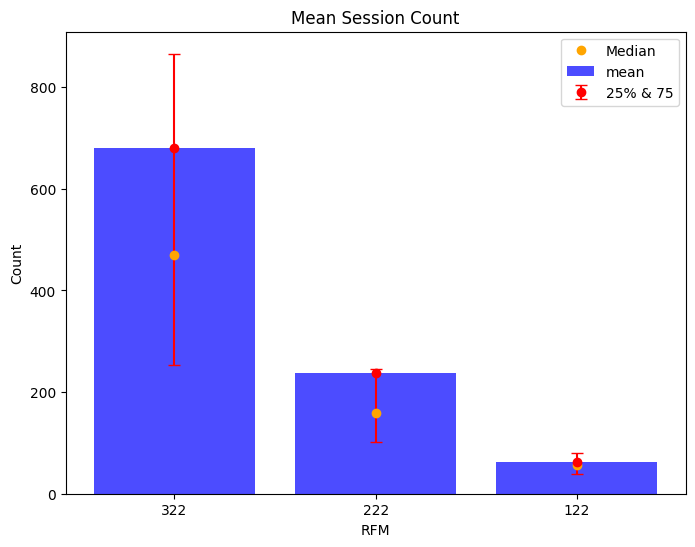

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# x 축 값
segments = ['322', '222', '122']


# 세그먼트, 평균, 25%, 75% 값을 가진 리스트
means = np.array([list_statistic(df_322_g_l)['mean'][0], list_statistic(df_222_g_l)['mean'][0], list_statistic(df_122_g_l)['mean'][0]])
l_25 = np.array([list_statistic(df_322_g_l)['25%'][0], list_statistic(df_222_g_l)['25%'][0], list_statistic(df_122_g_l)['25%'][0]])
u_75 = np.array([(list_statistic(df_322_g_l)['75%'][0]), list_statistic(df_222_g_l)['75%'][0], list_statistic(df_122_g_l)['75%'][0]])
m_50 = np.array([(list_statistic(df_322_g_l)['50%'][0]), list_statistic(df_222_g_l)['50%'][0], list_statistic(df_122_g_l)['50%'][0]])


# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(segments, means, color = 'blue', alpha = 0.7, label = 'mean')
plt.errorbar(segments, means, yerr=[means - l_25, u_75 - means], fmt='o', capsize=4, label='25% & 75', color = 'red')
plt.plot(segments, m_50, 'o', label='Median', color = 'orange')
plt.xlabel('RFM')
plt.ylabel('Count')
plt.title('Mean Session Count')
plt.legend()

plt.show()


### 세션 길이 1인 세션 제거

In [ ]:
df_322_n1_g = n1_322.groupby('customer_id')
df_322_n1_g_l = []
for g, row in df_322_n1_g:
    df_322_n1_g_l.append(row.session_id.nunique())
list_statistic(df_322_n1_g_l)

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
df_222_n1_g = n1_222.groupby('customer_id')
df_222_n1_g_l = []
for g, row in df_222_n1_g:
    df_222_n1_g_l.append(row.session_id.nunique())
list_statistic(df_222_n1_g_l)

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
df_122_n1_g = n1_122.groupby('customer_id')
df_122_n1_g_l = []
for g, row in df_122_n1_g:
    df_122_n1_g_l.append(row.session_id.nunique())
list_statistic(df_122_n1_g_l)

,mean,std,min,25%,50%,75%,max
0,7.443269,4.552963,1,4.0,7.0,11.0,32


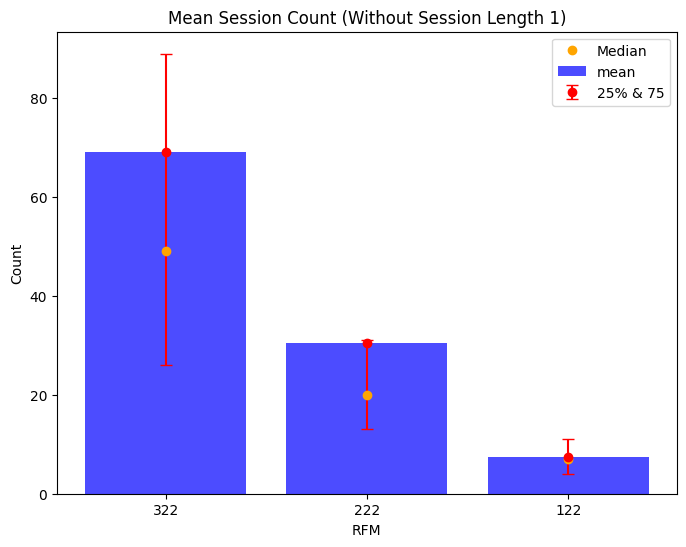

In [ ]:

# 세그먼트, 평균, 25%, 75% 값을 가진 리스트
means = np.array([list_statistic(df_322_n1_g_l)['mean'][0], list_statistic(df_222_n1_g_l)['mean'][0], list_statistic(df_122_n1_g_l)['mean'][0]])
l_25 = np.array([list_statistic(df_322_n1_g_l)['25%'][0], list_statistic(df_222_n1_g_l)['25%'][0], list_statistic(df_122_n1_g_l)['25%'][0]])
u_75 = np.array([(list_statistic(df_322_n1_g_l)['75%'][0]), list_statistic(df_222_n1_g_l)['75%'][0], list_statistic(df_122_n1_g_l)['75%'][0]])
m_50 = np.array([(list_statistic(df_322_n1_g_l)['50%'][0]), list_statistic(df_222_n1_g_l)['50%'][0], list_statistic(df_122_n1_g_l)['50%'][0]])


# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(segments, means, color = 'blue', alpha = 0.7, label = 'mean')
plt.errorbar(segments, means, yerr=[means - l_25, u_75 - means], fmt='o', capsize=4, label='25% & 75', color = 'red')
plt.plot(segments, m_50, 'o', label='Median', color = 'orange')
plt.xlabel('RFM')
plt.ylabel('Count')
plt.title('Mean Session Count (Without Session Length 1)')
plt.legend()

plt.show()


### 세션 길이 1인 세션만

In [ ]:
df_322_o1_g = o1_322.groupby('customer_id')
df_322_o1_g_l = []
for g, row in df_322_o1_g:
    df_322_o1_g_l.append(row.session_id.nunique())
list_statistic(df_322_o1_g_l)

,mean,std,min,25%,50%,75%,max
0,448.053347,438.052465,1,162.0,315.0,586.25,5524


In [ ]:
df_222_o1_g = o1_222.groupby('customer_id')
df_222_o1_g_l = []
for g, row in df_222_o1_g:
    df_222_o1_g_l.append(row.session_id.nunique())
list_statistic(df_222_o1_g_l)

,mean,std,min,25%,50%,75%,max
0,154.466525,211.527201,1,63.0,103.0,166.0,2955


In [ ]:
df_122_o1_g = o1_122.groupby('customer_id')
df_122_o1_g_l = []
for g, row in df_122_o1_g:
    df_122_o1_g_l.append(row.session_id.nunique())
list_statistic(df_122_o1_g_l)

,mean,std,min,25%,50%,75%,max
0,37.6,27.647239,1,19.0,31.0,49.0,244


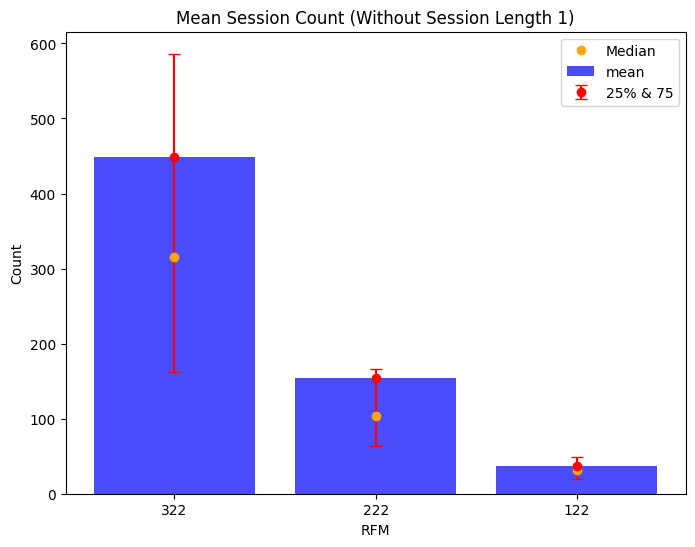

In [ ]:

# 세그먼트, 평균, 25%, 75% 값을 가진 리스트
means = np.array([list_statistic(df_322_o1_g_l)['mean'][0], list_statistic(df_222_o1_g_l)['mean'][0], list_statistic(df_122_o1_g_l)['mean'][0]])
l_25 = np.array([list_statistic(df_322_o1_g_l)['25%'][0], list_statistic(df_222_o1_g_l)['25%'][0], list_statistic(df_122_o1_g_l)['25%'][0]])
u_75 = np.array([(list_statistic(df_322_o1_g_l)['75%'][0]), list_statistic(df_222_o1_g_l)['75%'][0], list_statistic(df_122_o1_g_l)['75%'][0]])
m_50 = np.array([(list_statistic(df_322_o1_g_l)['50%'][0]), list_statistic(df_222_o1_g_l)['50%'][0], list_statistic(df_122_o1_g_l)['50%'][0]])


# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(segments, means, color = 'blue', alpha = 0.7, label = 'mean')
plt.errorbar(segments, means, yerr=[means - l_25, u_75 - means], fmt='o', capsize=4, label='25% & 75', color = 'red')
plt.plot(segments, m_50, 'o', label='Median', color = 'orange')
plt.xlabel('RFM')
plt.ylabel('Count')
plt.title('Mean Session Count (Without Session Length 1)')
plt.legend()

plt.show()


## 마지막 세션 이벤트 분석

In [ ]:
def last_event(df):
    event_counts = {}
    total_events = 0

    def get_last_event(row):
        nonlocal event_counts, total_events
        last_event = row.iloc[-1]["event list"][-1]
        event_counts[last_event] = event_counts.get(last_event, 0) + 1
        total_events += 1

    df.groupby('customer_id').apply(lambda x: x.groupby('session_id').apply(get_last_event))

    event_labels = list(event_counts.keys())
    event_ratios = [count / total_events for count in event_counts.values()]

    plt.pie(x=event_ratios, labels=event_labels)
    plt.show()

    return event_counts

### 전체 세션 사용

In [ ]:
df_session_info_rfm

,session_id,customer_id,number of events,event list,session duration,RFM_Segment
0,00001f29-3ede-4445-95f0-0178934e32ba_2_0,74433.0,1,[HOMEPAGE],0.0,322.0
1,00001f29-3ede-4445-95f0-0178934e32ba_2_1,74433.0,2,"[ADD_TO_CART, HOMEPAGE]",19.0,322.0
2,00001f29-3ede-4445-95f0-0178934e32ba_2_2,74433.0,1,[CLICK],0.0,322.0
3,00001f29-3ede-4445-95f0-0178934e32ba_2_3,74433.0,1,[CLICK],0.0,322.0
4,00001f29-3ede-4445-95f0-0178934e32ba_2_4,74433.0,1,[ITEM_DETAIL],0.0,322.0
...,...,...,...,...,...,...
9365074,fffffaf6-55ee-428b-a3bf-075cd7f1a093_5,52089.0,1,[SCROLL],0.0,322.0
9365075,fffffaf6-55ee-428b-a3bf-075cd7f1a093_6,52089.0,1,[SEARCH],0.0,322.0
9365076,fffffaf6-55ee-428b-a3bf-075cd7f1a093_7,52089.0,1,[HOMEPAGE],0.0,322.0
9365077,fffffaf6-55ee-428b-a3bf-075cd7f1a093_8,52089.0,1,[ITEM_DETAIL],0.0,322.0


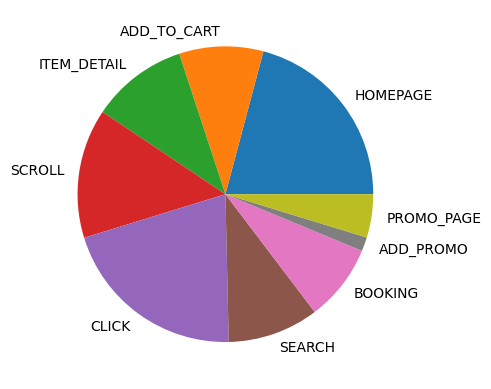

{'HOMEPAGE': 1476985,
 'ADD_TO_CART': 651423,
 'ITEM_DETAIL': 747267,
 'SCROLL': 1002195,
 'CLICK': 1458659,
 'SEARCH': 705722,
 'BOOKING': 596096,
 'ADD_PROMO': 107955,
 'PROMO_PAGE': 335142}

In [ ]:
last_event(df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 322)])

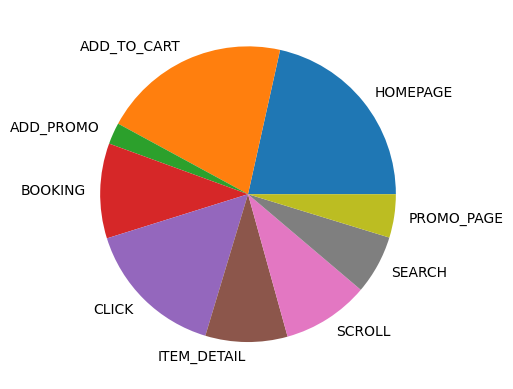

{'HOMEPAGE': 336476,
 'ADD_TO_CART': 321616,
 'ADD_PROMO': 36879,
 'BOOKING': 162455,
 'CLICK': 242558,
 'ITEM_DETAIL': 140354,
 'SCROLL': 148433,
 'SEARCH': 100928,
 'PROMO_PAGE': 74113}

In [ ]:
last_event(df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 222)])

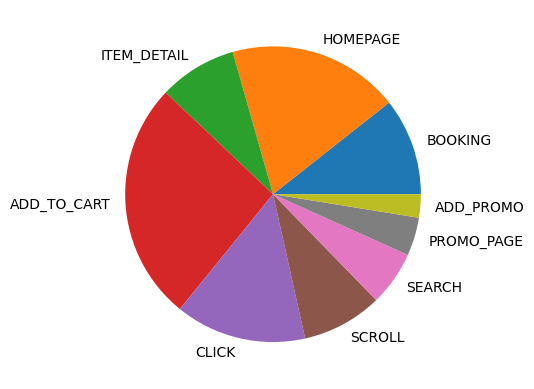

{'BOOKING': 4641,
 'HOMEPAGE': 8194,
 'ITEM_DETAIL': 3724,
 'ADD_TO_CART': 11443,
 'CLICK': 6256,
 'SCROLL': 3844,
 'SEARCH': 2607,
 'PROMO_PAGE': 1825,
 'ADD_PROMO': 1115}

In [ ]:
last_event(df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 122)])

### 세션 event가 1인 데이터 제거

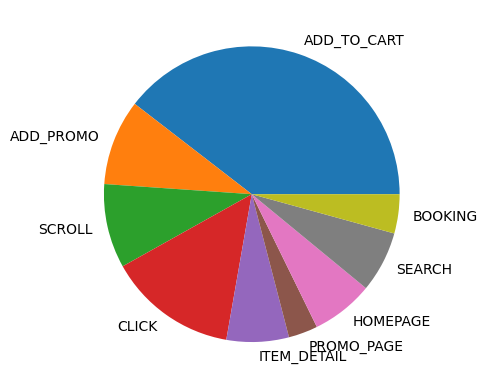

{'ADD_TO_CART': 375691,
 'ADD_PROMO': 89056,
 'SCROLL': 87457,
 'CLICK': 134290,
 'ITEM_DETAIL': 64740,
 'PROMO_PAGE': 30426,
 'HOMEPAGE': 64468,
 'SEARCH': 63482,
 'BOOKING': 40672}

In [ ]:
last_event(df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 322) & (df_session_info_rfm['number of events'] != 1)])

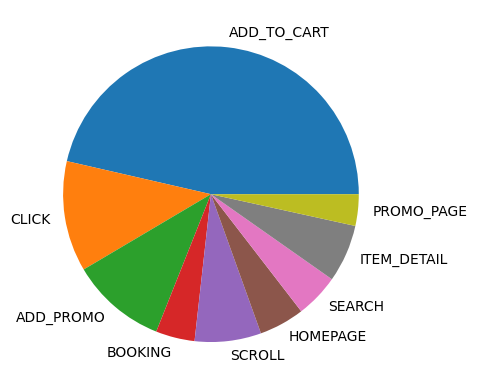

{'ADD_TO_CART': 119710,
 'CLICK': 31202,
 'ADD_PROMO': 26998,
 'BOOKING': 10989,
 'SCROLL': 18734,
 'HOMEPAGE': 12805,
 'SEARCH': 12357,
 'ITEM_DETAIL': 16264,
 'PROMO_PAGE': 8893}

In [ ]:
last_event(df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 222) & (df_session_info_rfm['number of events'] != 1)])

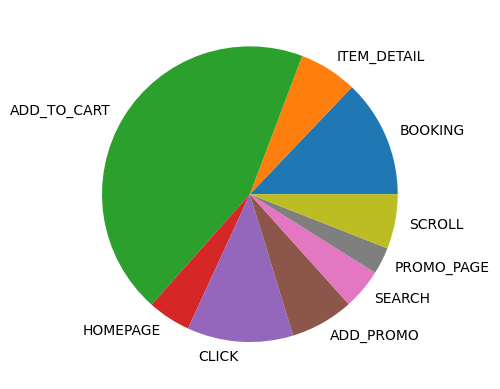

{'BOOKING': 997,
 'ITEM_DETAIL': 492,
 'ADD_TO_CART': 3421,
 'HOMEPAGE': 364,
 'CLICK': 898,
 'ADD_PROMO': 536,
 'SEARCH': 343,
 'PROMO_PAGE': 228,
 'SCROLL': 462}

In [ ]:
last_event(df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 122) & (df_session_info_rfm['number of events'] != 1)])

### 세션 길이가 1인 데이터

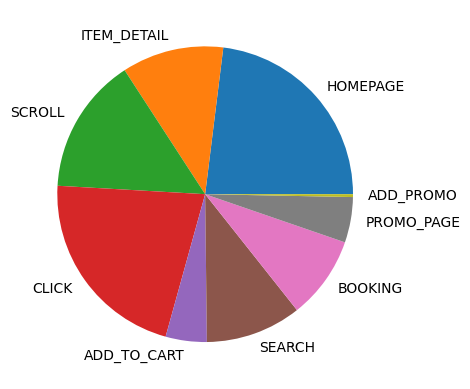

{'HOMEPAGE': 1412517,
 'ITEM_DETAIL': 682527,
 'SCROLL': 914738,
 'CLICK': 1324369,
 'ADD_TO_CART': 275732,
 'SEARCH': 642240,
 'BOOKING': 555424,
 'PROMO_PAGE': 304716,
 'ADD_PROMO': 18899}

In [ ]:
last_event(df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 322) & (df_session_info_rfm['number of events'] == 1)])

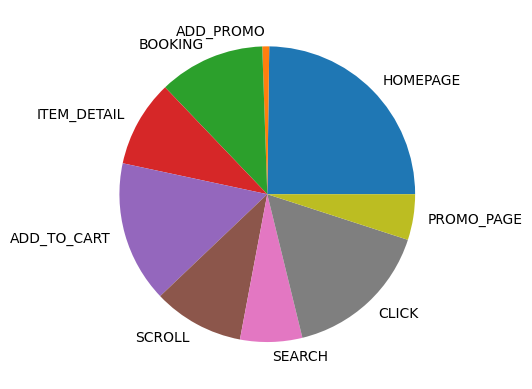

{'HOMEPAGE': 323671,
 'ADD_PROMO': 9881,
 'BOOKING': 151466,
 'ITEM_DETAIL': 124090,
 'ADD_TO_CART': 201906,
 'SCROLL': 129699,
 'SEARCH': 88571,
 'CLICK': 211356,
 'PROMO_PAGE': 65220}

In [ ]:
last_event(df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 222) & (df_session_info_rfm['number of events'] == 1)])

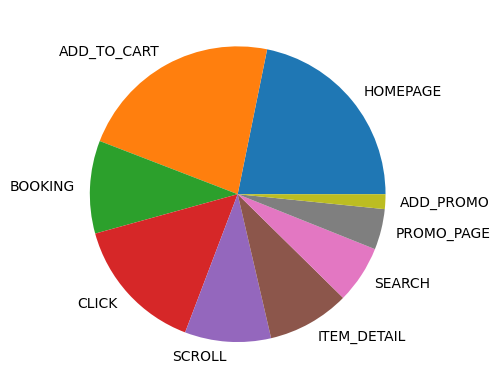

{'HOMEPAGE': 7830,
 'ADD_TO_CART': 8022,
 'BOOKING': 3644,
 'CLICK': 5358,
 'SCROLL': 3382,
 'ITEM_DETAIL': 3232,
 'SEARCH': 2264,
 'PROMO_PAGE': 1597,
 'ADD_PROMO': 579}

In [ ]:
last_event(df_session_info_rfm[(df_session_info_rfm.RFM_Segment == 122) & (df_session_info_rfm['number of events'] == 1)])

## segment - 월별 마지막 이벤트

In [ ]:
raw_322_m = raw_322.groupby(pd.Grouper(key='event_time', freq='M'))
raw_222_m = raw_222.groupby(pd.Grouper(key='event_time', freq='M'))
raw_122_m = raw_122.groupby(pd.Grouper(key='event_time', freq='M'))

In [ ]:
raw_322_m_l = {}
for m, row in raw_322_m:
    ls = []
    r_g = row.groupby('session_id')
    for s, row_2 in r_g:
        ls.append(row_2.iloc[-1]['event_name'])
    raw_322_m_l[m.month] = ls

In [ ]:
raw_222_m_l = {}
for m, row in raw_222_m:
    ls = []
    r_g = row.groupby('session_id')
    for s, row_2 in r_g:
        ls.append(row_2.iloc[-1]['event_name'])
    raw_222_m_l[m.month] = ls

In [ ]:
raw_122_m_l = {}
for m, row in raw_122_m:
    ls = []
    r_g = row.groupby('session_id')
    for s, row_2 in r_g:
        ls.append(row_2.iloc[-1]['event_name'])
    raw_122_m_l[m.month] = ls

## 세션 길이가 1인 세션 수

In [ ]:
len(o1_322) / a_322.customer_id.nunique() / (len(a_322) / a_322.customer_id.nunique())

0.8658067478892723

In [ ]:
len(o1_222) / a_222.customer_id.nunique() / (len(a_222) / a_222.customer_id.nunique())

0.8350492258660248

In [ ]:
len(o1_122) / a_122.customer_id.nunique() / (len(a_122) / a_122.customer_id.nunique())

0.8226534399413503

## 평균 체류시간

In [ ]:
df_session_info_rfm['session duration'] += 1800

### 전체 데이터

In [ ]:
a_322['session duration'].describe()

count    7.081444e+06
mean     1.543335e+02
std      2.064198e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.816830e+05
Name: session duration, dtype: float64

In [ ]:
a_222['session duration'].describe()

count    1.563812e+06
mean     1.216751e+02
std      1.598127e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.290430e+05
Name: session duration, dtype: float64

In [ ]:
a_122['session duration'].describe()

count    43649.000000
mean       143.603406
std        488.364765
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      27691.000000
Name: session duration, dtype: float64

### 세션 길이 1인 데이터 제거

In [ ]:
n1_322['session duration'].describe()

count    950282.000000
mean       1150.084034
std        5532.351046
min           0.000000
25%          79.000000
50%         191.000000
75%         433.000000
max      481683.000000
Name: session duration, dtype: float64

In [ ]:
n1_222['session duration'].describe()

count    257952.000000
mean        737.644653
std        3876.744284
min           0.000000
25%         114.000000
50%         291.000000
75%         657.000000
max      729043.000000
Name: session duration, dtype: float64

In [ ]:
n1_122['session duration'].describe()

count     7741.000000
mean       809.733246
std        897.502694
min          0.000000
25%        253.000000
50%        600.000000
75%       1144.000000
max      27691.000000
Name: session duration, dtype: float64

## 세션 평균 이벤트 수

### 전체 세션

In [ ]:
a_322[a_322['number of events'] == 2]['event list']

1             [ADD_TO_CART, HOMEPAGE]
37            [HOMEPAGE, ADD_TO_CART]
45               [ADD_TO_CART, CLICK]
68         [ADD_TO_CART, ADD_TO_CART]
135        [ADD_TO_CART, ITEM_DETAIL]
                      ...            
9364986       [ADD_TO_CART, HOMEPAGE]
9365025          [CLICK, ADD_TO_CART]
9365029           [SCROLL, ADD_PROMO]
9365038     [ADD_TO_CART, PROMO_PAGE]
9365049      [ADD_PROMO, ITEM_DETAIL]
Name: event list, Length: 871105, dtype: object

In [ ]:
a_322[a_322['number of events'] > 2]['number of events'].describe()

count    79177.000000
mean        18.718201
std         17.405515
min          3.000000
25%          7.000000
50%         14.000000
75%         24.000000
max        470.000000
Name: number of events, dtype: float64

In [ ]:
a_222['number of events'].describe()

count    1.563812e+06
mean     1.284632e+00
std      2.097568e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.360000e+02
Name: number of events, dtype: float64

In [ ]:
a_122['number of events'].describe()

count    43649.000000
mean         1.494582
std          3.038792
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        233.000000
Name: number of events, dtype: float64

### 집중 세션

In [ ]:
n1_322['number of events'].describe()

count    950282.000000
mean          3.392952
std           6.825603
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         470.000000
Name: number of events, dtype: float64

In [ ]:
n1_222['number of events'].describe()

count    257952.000000
mean          2.725557
std           4.918031
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         636.000000
Name: number of events, dtype: float64

In [ ]:
n1_122['number of events'].describe()

count    7741.000000
mean        3.788787
std         6.758378
min         2.000000
25%         2.000000
50%         2.000000
75%         2.000000
max       233.000000
Name: number of events, dtype: float64

In [ ]:
a_322

,session_id,customer_id,number of events,event list,session duration,RFM_Segment
0,00001f29-3ede-4445-95f0-0178934e32ba_2_0,74433.0,1,[HOMEPAGE],0.0,322.0
1,00001f29-3ede-4445-95f0-0178934e32ba_2_1,74433.0,2,"[ADD_TO_CART, HOMEPAGE]",19.0,322.0
2,00001f29-3ede-4445-95f0-0178934e32ba_2_2,74433.0,1,[CLICK],0.0,322.0
3,00001f29-3ede-4445-95f0-0178934e32ba_2_3,74433.0,1,[CLICK],0.0,322.0
4,00001f29-3ede-4445-95f0-0178934e32ba_2_4,74433.0,1,[ITEM_DETAIL],0.0,322.0
...,...,...,...,...,...,...
9365074,fffffaf6-55ee-428b-a3bf-075cd7f1a093_5,52089.0,1,[SCROLL],0.0,322.0
9365075,fffffaf6-55ee-428b-a3bf-075cd7f1a093_6,52089.0,1,[SEARCH],0.0,322.0
9365076,fffffaf6-55ee-428b-a3bf-075cd7f1a093_7,52089.0,1,[HOMEPAGE],0.0,322.0
9365077,fffffaf6-55ee-428b-a3bf-075cd7f1a093_8,52089.0,1,[ITEM_DETAIL],0.0,322.0


In [4]:
df_session_rfm = pd.merge(df_session, rfm, on = 'customer_id', how = 'left')

NameError: name 'df_session' is not defined

In [ ]:
raw_322 = df_session_rfm[df_session_rfm['RFM_Segment'] == 322]
raw_222 = df_session_rfm[df_session_rfm['RFM_Segment'] == 222]
raw_122 = df_session_rfm[df_session_rfm['RFM_Segment'] == 122]

## segment 별 방문주기

In [ ]:
np.argmax(a_322['session duration'])

4781164

In [ ]:
a_322.iloc[4781164]

session_id                     ad16c956-9c7f-476a-8733-703ddda6db6b_2
customer_id                                                   73583.0
number of events                                                  320
event list          [BOOKING, HOMEPAGE, CLICK, ITEM_DETAIL, HOMEPA...
session duration                                             481683.0
RFM_Segment                                                     322.0
Name: 6322553, dtype: object

In [ ]:
x = df_buy_split[df_buy_split['session_id'] == 'ad16c956-9c7f-476a-8733-703ddda6db6b_2']
x.event_time = pd.to_datetime(x.event_time)

C:\Users\hm981\AppData\Local\Temp\ipykernel_29116\542269097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.event_time = pd.to_datetime(x.event_time)
